#  Analysis of User Engagement on Netflix



## 1.1 Project Overview
Netflix, one of the world's leading streaming platforms, continually seeks to enhance user experience by understanding viewer engagement. This project explores the factors that drive user engagement on Netflix, focusing on metrics such as ratings and watchtime.

## 1.2 Goals and Objectives
- Identify key factors influencing user engagement.
- Analyze how these factors vary across different regions.
- Provide recommendations to improve content recommendations and viewer satisfaction.

## 1.3 Methodology
We will use a combination of data from the IMDB API, TMDB API, and various Netflix-related datasets available on Kaggle. The analysis will involve data cleaning, exploratory data analysis, feature engineering, statistical analysis, and predictive modeling.

Kaggle Dataset: https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows

Netflix Engagment Report: https://about.netflix.com/en/news/what-we-watched-a-netflix-engagement-report

TMDB API:https://www.themoviedb.org/?language=en-GB

In [14]:
import pandas as pd

api_data_df= pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Netflix_project\repo\Netflix_content_analysis\combined_api_df.csv")
netflix_titles_df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Netflix_project\repo\Netflix_content_analysis\netflix_titles.csv")
hours_watched_df= pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Netflix_project\repo\Netflix_content_analysis\hours_watched.csv")  

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns #-for dizualisation of data

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor #- for analysis and modelling


### Reading the data

In [39]:

# Display the inital rows of both datasets
netflix_titles.head() #dataset_2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Data Cleaning

In [40]:
column_drop = 'description'

netflix_titles.drop(columns=[column_drop], inplace=True)
print("\nDataFrame after dropping the columns:\n")
print(netflix_titles.info())


DataFrame after dropping the columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [41]:
netflix_titles.rename(columns={"date_added": "date", "listed_in": "genre"}, inplace=True)
print(netflix_titles['date'].head())

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date, dtype: object


In [42]:
print(netflix_titles['date'].head())  


0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date, dtype: object


It's more appropriate to convert the date_added to a datetime data- type in pandas for better handling of date-related operations.


In [43]:
print('\n date column with datetime datatype: \n')
print(netflix_titles['date'].head())


 date column with datetime datatype: 

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date, dtype: object


In [ ]:
date_added_mode = netflix_titles_df['date_added'].mode()[0]

# Fill the missing values in the 'date_added' column with the mode
netflix_titles_df.fillna({'date_added': date_added_mode}, inplace=True)

Out of 8807 rows of data, column 'country' has 7976 non null values, instead of deleting rows with null values, we can fill them with the value 'unknown', so that we don't lose out on valueable data

In [59]:
netflix_titles.fillna({'country':'Unknown'}, inplace=True)

In [45]:
print("Having no 'null' values in the country column: \n")
print(netflix_titles['country'].info())

Having no 'null' values in the country column: 

<class 'pandas.core.series.Series'>
RangeIndex: 8807 entries, 0 to 8806
Series name: country
Non-Null Count  Dtype 
--------------  ----- 
8807 non-null   object
dtypes: object(1)
memory usage: 68.9+ KB
None


In [57]:
netflix_titles.fillna({'rating': 'Not Rated', 'release_year': 'Unknown'}, inplace=True)


In [50]:
duplicate_rows = netflix_titles[netflix_titles.duplicated()]
duplicate_rows = netflix_titles[netflix_titles.duplicated()]
print(f"\nNumber of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


In [51]:
netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date          8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8804 non-null   object
 10  genre         8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [52]:
show_movie_count = netflix_titles['type'].value_counts().reset_index()
show_movie_count

,type,count
0,Movie,6131
1,TV Show,2676


In [16]:
api_data_df.head(5)

,title,release_date,popularity,vote_average,genre_ids,genre_names,type
0,The Kelly Clarkson Show,09/09/2019,1478.168,6.280,[10767],Talk,tvshow
1,Grey's Anatomy,27/03/2005,1420.393,8.235,[18],Drama,tvshow
2,Sherri,12/09/2022,1326.580,4.200,[10767],Talk,tvshow
3,Bridgerton,25/12/2020,1301.462,8.100,[18],Drama,tvshow
4,Four in a Bed,22/11/2010,1148.900,6.875,[10764],Reality,tvshow


In [61]:
api_data_df.describe()
api_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11691 entries, 0 to 11690
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         11691 non-null  object 
 1   release_date  11661 non-null  object 
 2   popularity    11691 non-null  float64
 3   vote_average  11691 non-null  float64
 4   genre_ids     11691 non-null  object 
 5   genre_names   11572 non-null  object 
 6   type          11691 non-null  object 
dtypes: float64(2), object(5)
memory usage: 639.5+ KB


In [62]:
api_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11691 entries, 0 to 11690
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         11691 non-null  object 
 1   release_date  11661 non-null  object 
 2   popularity    11691 non-null  float64
 3   vote_average  11691 non-null  float64
 4   genre_ids     11691 non-null  object 
 5   genre_names   11572 non-null  object 
 6   type          11691 non-null  object 
dtypes: float64(2), object(5)
memory usage: 639.5+ KB


### Exploratory Analysis

 Firstly, we aim to identify the top genres based on the number of movies using an imdb api and compare these findings with the Netflix data. This comparison will help us understand if platforms such as Netflix reflects the data on genre or if it follows current trends and produces content based on users' viewing preferences.


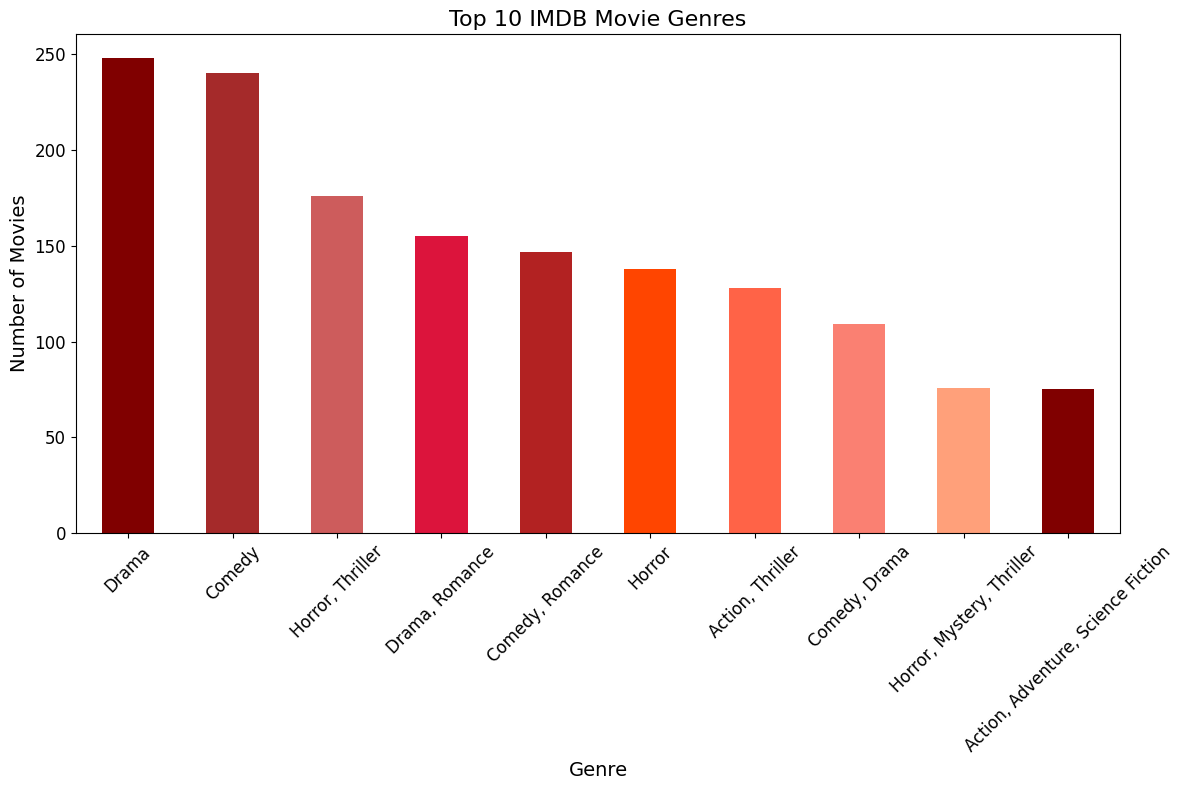

In [17]:

movie_data_df = api_data_df[api_data_df['type'] == 'movie']
#adding range of colours for gaph to be more visually appealing 
colors = ['#FFA07A', '#FA8072', '#FF6347', '#FF4500', '#B22222', '#DC143C', '#CD5C5C', '#A52A2A', '#800000']
imdb_genre_counts =movie_data_df['genre_names'].value_counts() 
top10_genres = imdb_genre_counts.head(10)
plt.figure(figsize=(12, 8))
top10_genres.plot(kind='bar', color=colors[::-1])
plt.xlabel('Genre', fontsize =14)
plt.ylabel('Number of Movies', fontsize = 14)
plt.title('Top 10 IMDB Movie Genres', fontsize = 16)
plt.xticks(rotation=45, fontsize = 12)  # Rotate the x-axis labels by 45 degrees
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

The drama, comedy, horror, and thriller genres collectively represent a substantial portion of the content available on IMDb, indicating their popularity and prominence among viewers and creators.

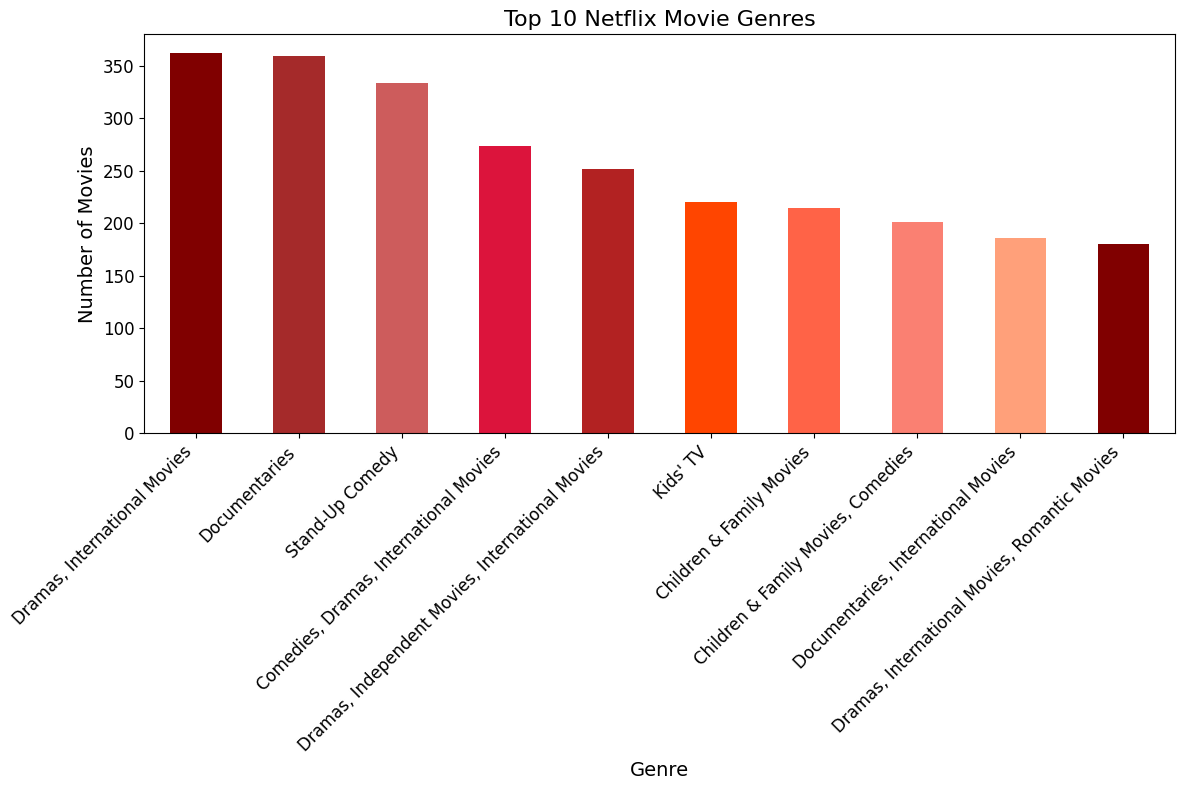

In [18]:

netflix_movie_data_df = netflix_titles_df[netflix_titles_df['type'] == 'Movie']

colors = ['#FFA07A', '#FA8072', '#FF6347', '#FF4500', '#B22222', '#DC143C', '#CD5C5C', '#A52A2A', '#800000']
netflix_genre_counts =netflix_titles_df['genre'].value_counts()
top10_genres = netflix_genre_counts.head(10)
plt.figure(figsize=(12, 8))
top10_genres.plot(kind='bar', color=colors[::-1])
plt.xlabel('Genre', fontsize =14)
plt.ylabel('Number of Movies', fontsize = 14)
plt.title('Top 10 Netflix Movie Genres', fontsize = 16)
plt.xticks(rotation=45, ha='right', fontsize = 12)  # Rotate the x-axis labels by 45 degrees
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

It seems like there's a difference between the top genres on IMDb and the top genres on Netflix. This could indicate variations in viewer preferences between the two platforms.

In [19]:
netflix_titles_df.head()


,show_id,type,title,director,cast,country,date,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [20]:
type_counts = netflix_titles_df['type'].value_counts()
print(type_counts)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


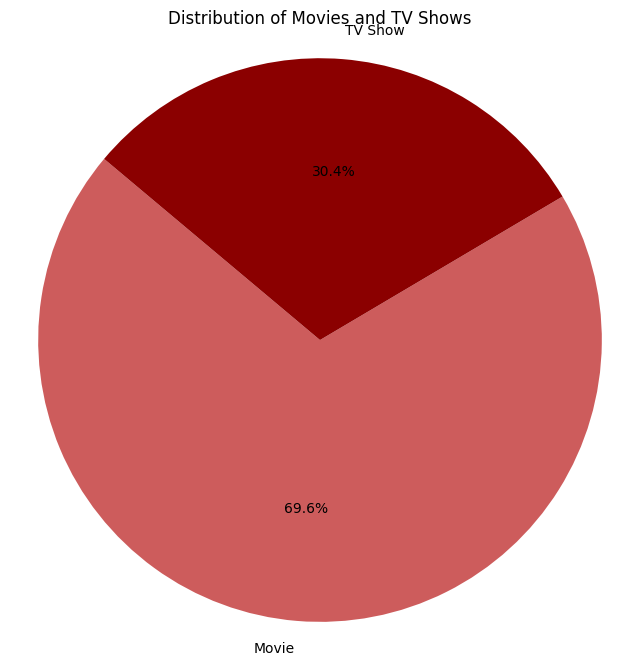

In [21]:
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#CD5C5C', '#8B0000'])
plt.title('Distribution of Movies and TV Shows')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

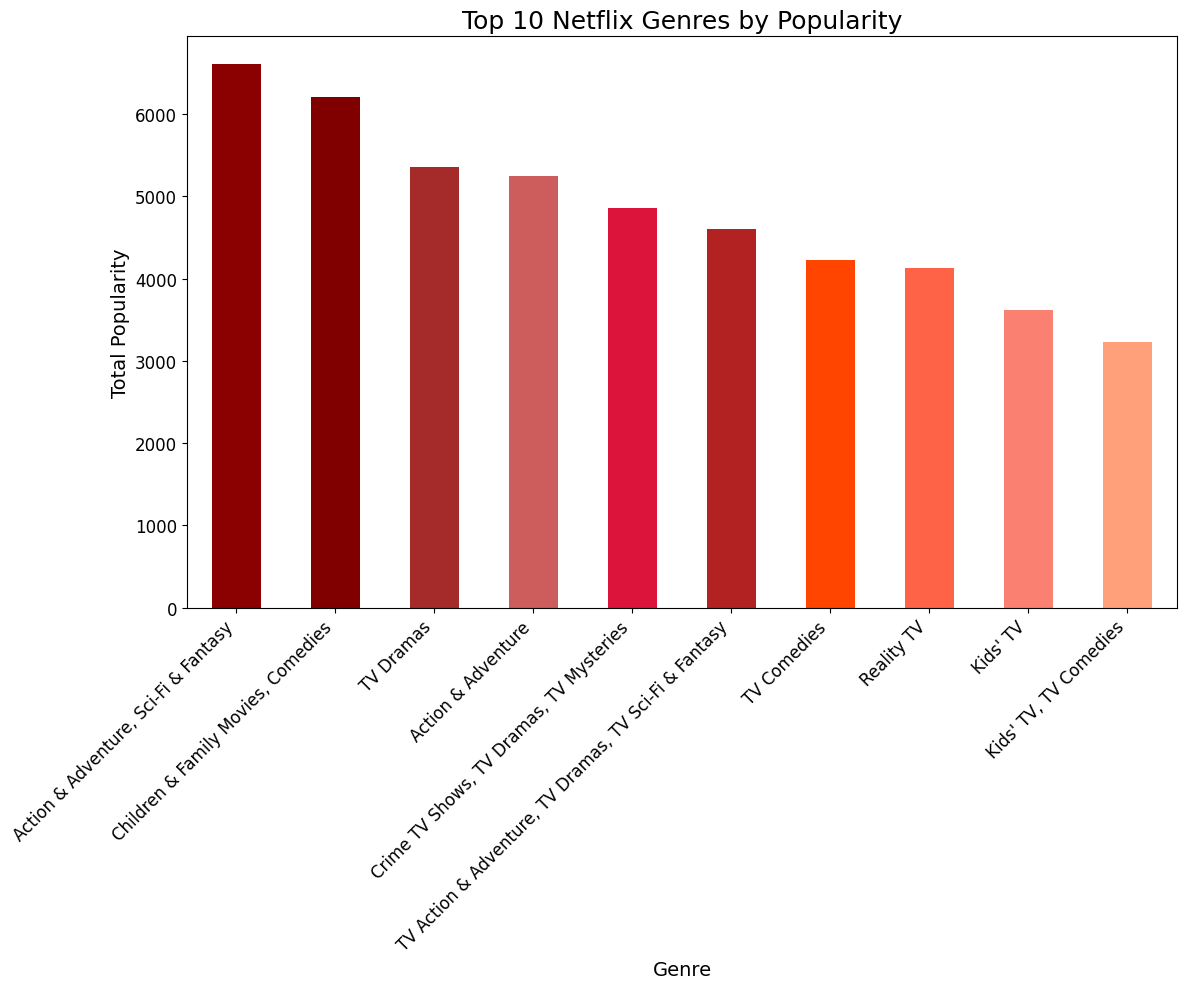

In [22]:
#seeing the top genre in netflix using the popularity score from imdb
merged_df = pd.merge(netflix_titles_df, api_data_df, on='title')
genre_popularity = merged_df.groupby('genre')['popularity'].sum().nlargest(10)
colors = ['#FFA07A', '#FA8072', '#FF6347', '#FF4500', '#B22222', '#DC143C', '#CD5C5C', '#A52A2A', '#800000', '#8B0000']

plt.figure(figsize=(12, 10 ))
genre_popularity.plot(kind='bar', color=colors[::-1])
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Popularity', fontsize=14)
plt.title('Top 10 Netflix Genres by Popularity', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1000))
plt.tight_layout()
plt.show()

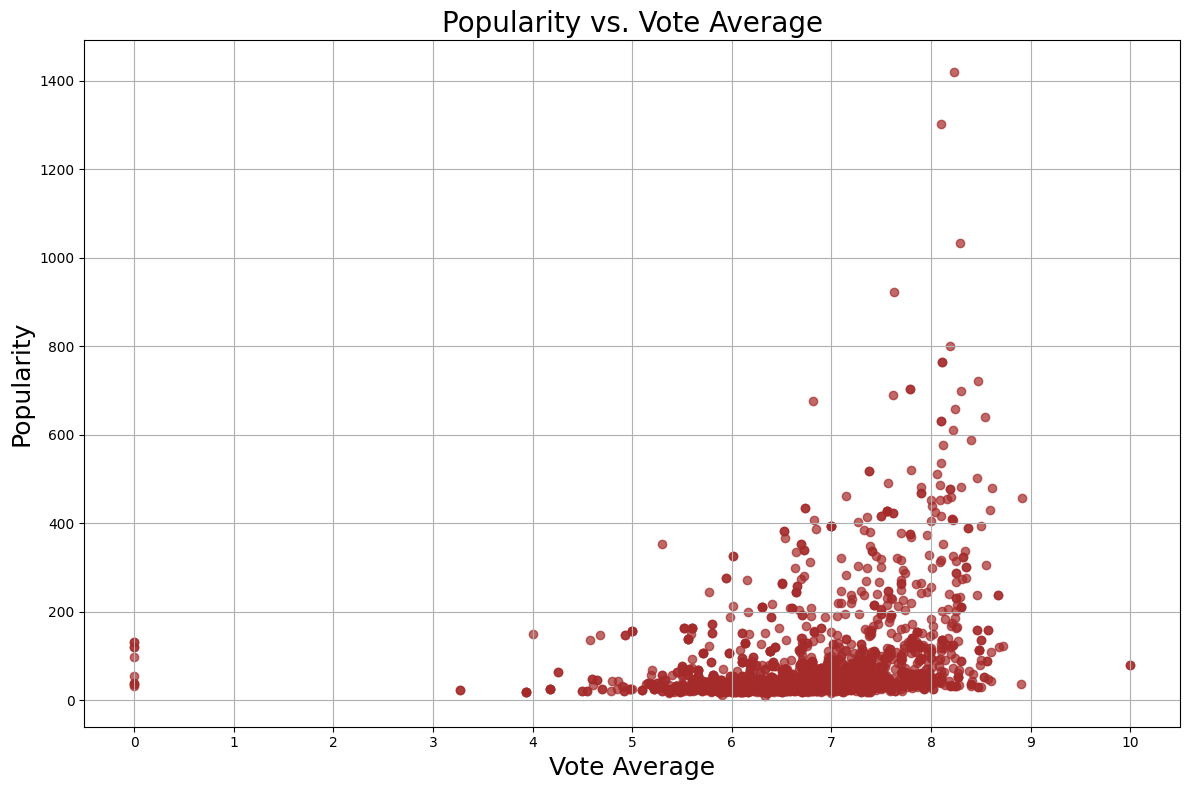

In [23]:
#correlating the average votes and popularity scores
import numpy as np

popularity = merged_df['popularity']
vote_average = merged_df['vote_average']

# Creating the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(vote_average,popularity, color='#A52A2A', alpha=0.7)

# Adding labels and title
plt.xlabel('Vote Average',fontsize = 18)
plt.ylabel('Popularity', fontsize = 18)
plt.title('Popularity vs. Vote Average', fontsize= 20)
plt.xticks(np.arange(0, 11, 1))
plt.grid(True)
# Adjusting layout
plt.tight_layout()

# Showing the plot
plt.show()

The scatter plot illustrates that content with IMDb scores above 7 tends to enjoy higher popularity levels. This suggests a strong correlation between higher IMDb ratings and increased viewer engagement.

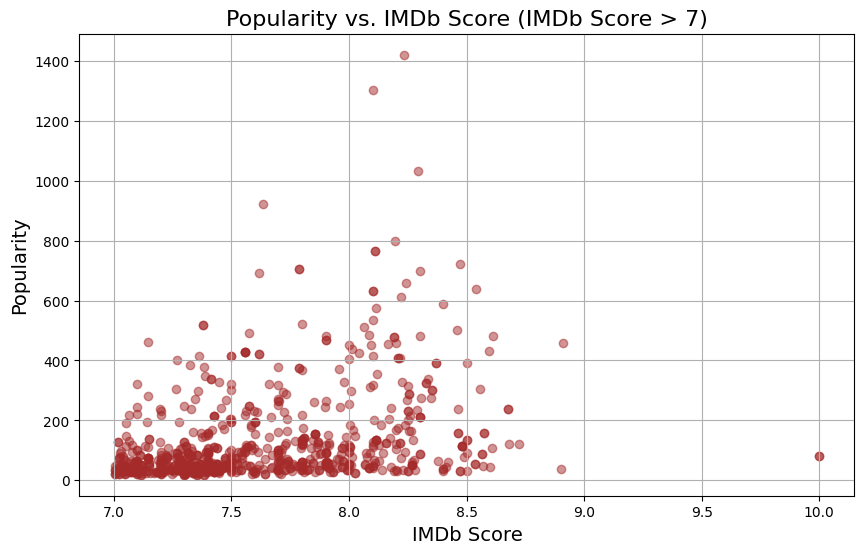

In [24]:


# Filter the data for IMDb scores greater than 7
high_imdb_df = merged_df[merged_df['vote_average'] > 7]

# Plot the scatter plot for popularity vs. IMDb scores
plt.figure(figsize=(10, 6))
plt.scatter(high_imdb_df['vote_average'], high_imdb_df['popularity'],color='#A52A2A', alpha=0.5)
plt.xlabel('IMDb Score', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.title('Popularity vs. IMDb Score (IMDb Score > 7)', fontsize=16)
plt.grid(True)
plt.show()


Upon closer examination, it's apparent that while content with IMDb scores above 7 tends to have higher popularity levels, the correlation isn't as strong as initially perceived. This indicates that factors other than IMDb ratings may also influence viewer engagement.

In [25]:
correlation = merged_df['vote_average'].corr(merged_df['popularity'])
print("Correlation coefficient between IMDb scores and popularity:", correlation)

Correlation coefficient between IMDb scores and popularity: 0.32227631881084656


The correlation coefficient between the IMDb scores and popularity levels is approximately 0.322. This indicates a positive correlation, meaning that as IMDb scores increase, popularity levels tend to increase as well. However, the correlation is relatively weak, suggesting that other factors may also influence popularity levels

In [26]:
country = netflix_titles_df['country'].value_counts().reset_index().sort_values(by='count',ascending = False).head(60)
country

,country,count
0,United States,2818
1,India,972
2,Unknown,831
3,United Kingdom,419
4,Japan,245
5,South Korea,199
6,Canada,181
7,Spain,145
8,France,124
9,Mexico,110


In [27]:
print('Count of total Content by Country:')
country = netflix_titles_df['country'].value_counts().reset_index().sort_values(by='count',ascending = False).head(10)
country


Count of total Content by Country:


,country,count
0,United States,2818
1,India,972
2,Unknown,831
3,United Kingdom,419
4,Japan,245
5,South Korea,199
6,Canada,181
7,Spain,145
8,France,124
9,Mexico,110


C:\Users\DELL\AppData\Local\Temp\ipykernel_10828\477439882.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_country.index, y=top_10_country, palette='hot')


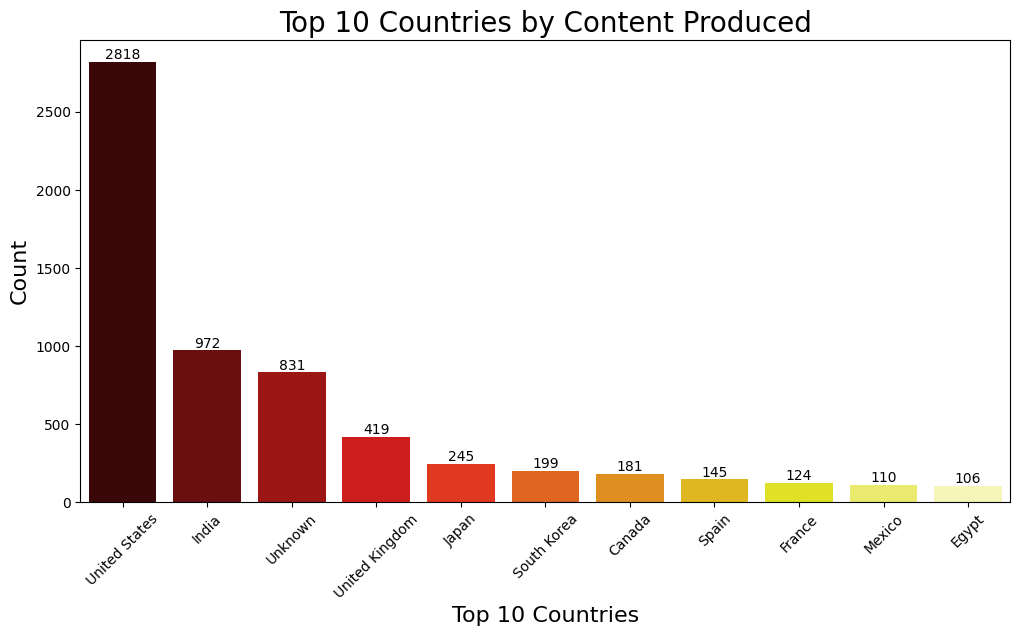

In [56]:
top_10_country = netflix_titles_df['country'].value_counts().head(11)
top_10_country.drop('Unknown')
plt.figure(figsize=(12,6))
plt.title('Top 10 Countries by Content Produced', fontsize=20)
ax = sns.barplot(x=top_10_country.index, y=top_10_country, palette='hot')
plt.xlabel('Top 10 Countries', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

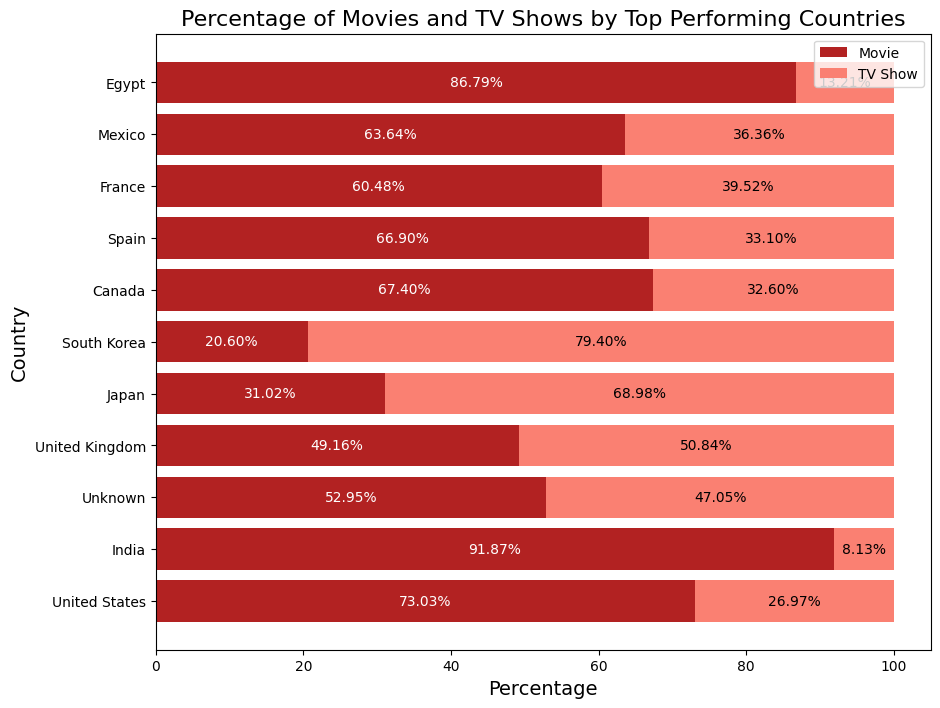

In [29]:
df= netflix_titles_df
percentage_df = pd.crosstab(df['country'], df['type'], normalize='index') * 100


# Getting the top 10 performing countries (from previous graph)
top_10_countries = netflix_titles_df['country'].value_counts().head(11).index
percentage_df = percentage_df.loc[top_10_countries]

# Plotting the graph
plt.figure(figsize=(10, 8))

# Plotting the movies
plt.barh(percentage_df.index, percentage_df['Movie'], color='#B22222', label='Movie')
# Plot TV shows on top of movies
plt.barh(percentage_df.index, percentage_df['TV Show'], left=percentage_df['Movie'], color='salmon', label='TV Show')


plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Percentage of Movies and TV Shows by Top Performing Countries', fontsize=16)
plt.legend()

plt.yticks(percentage_df.index)

# Add percentage labels to the bars so that they are more visible
for index, value in percentage_df.iterrows():
    plt.text(value['Movie'] / 2, index, f'{value["Movie"]:.2f}%', va='center', ha='center', color='white', fontsize=10)
    plt.text(value['Movie'] + value['TV Show'] / 2, index, f'{value["TV Show"]:.2f}%', va='center', ha='center', color='black', fontsize=10)

plt.show()


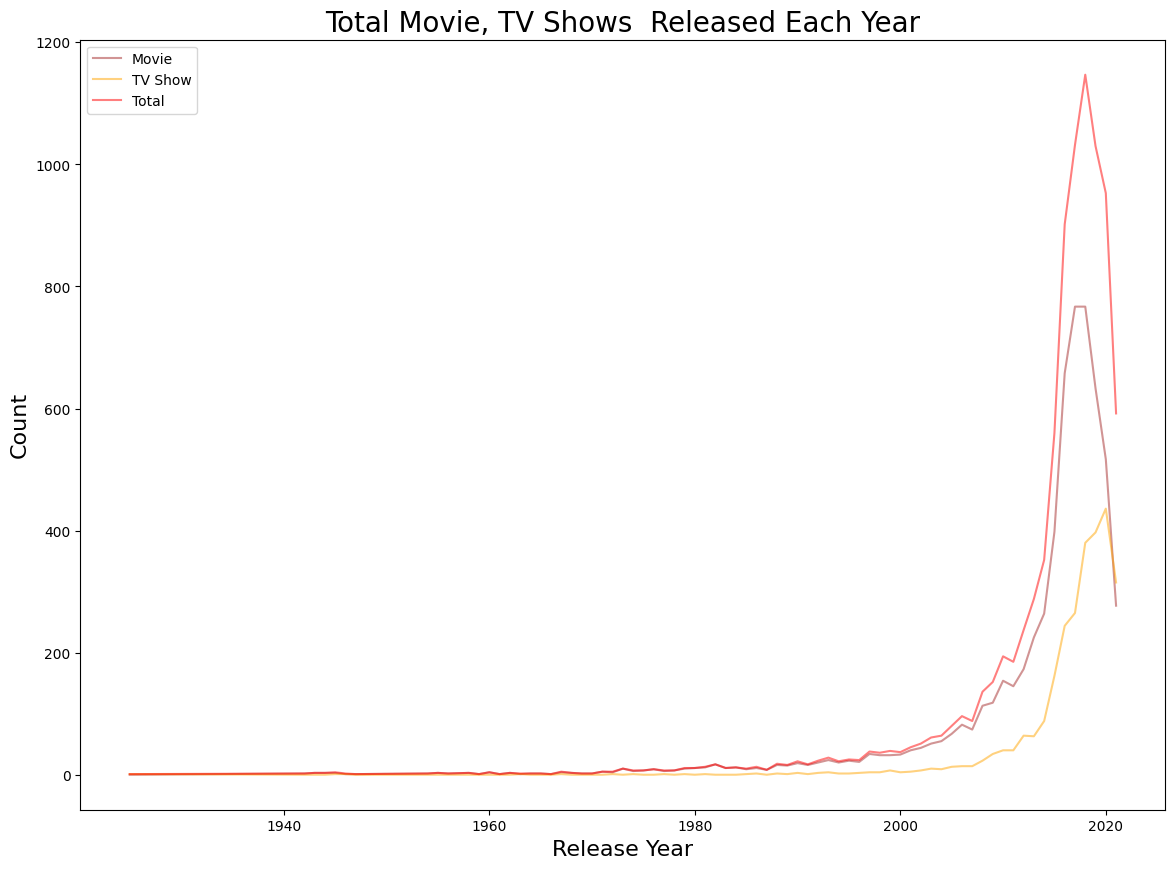

In [30]:
c_type = netflix_titles_df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
c_type['Total'] = c_type['Movie'] + c_type['TV Show']
c_type = c_type.reset_index()

plt.figure(figsize=(14,10))
plt.title('Total Movie, TV Shows  Released Each Year', fontsize=20)
plt.plot(c_type['release_year'], c_type['Movie'], label='Movie', color='brown', alpha=0.5)
plt.plot(c_type['release_year'], c_type['TV Show'], label='TV Show', color='orange', alpha=0.5)
plt.plot(c_type['release_year'], c_type['Total'], label='Total', color='red', alpha=0.5)
plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(loc='upper left')

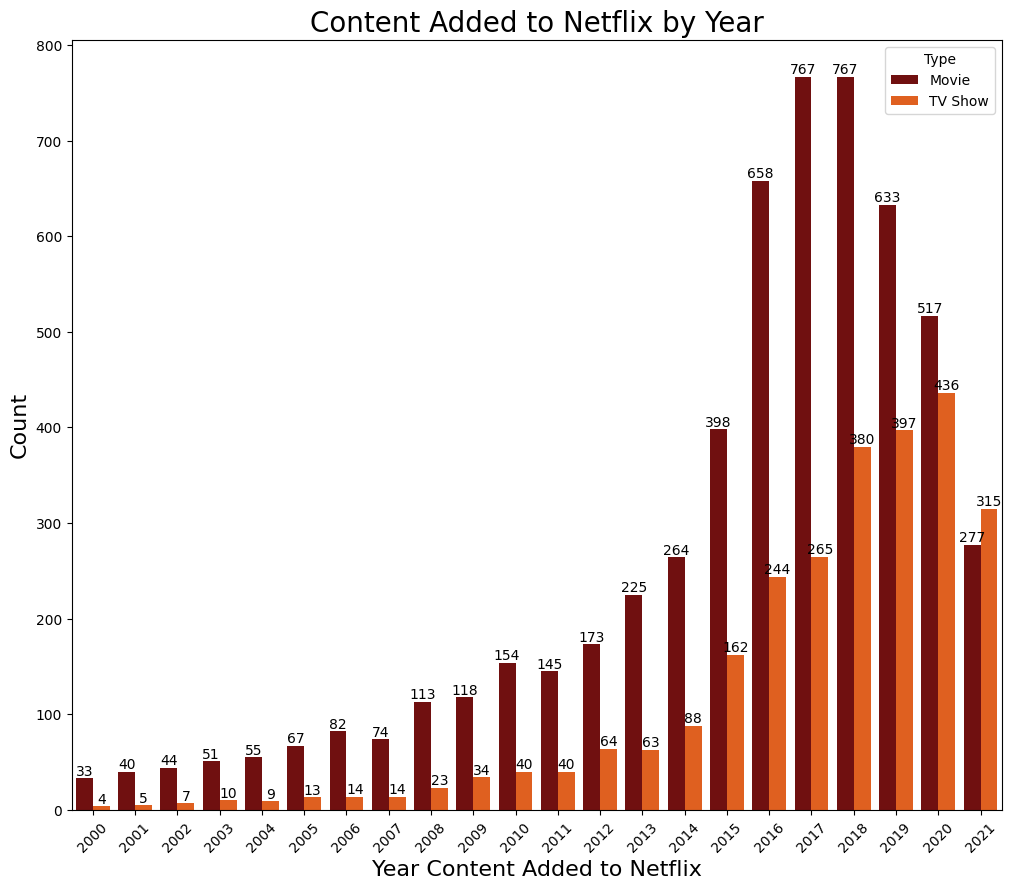

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the count of content added to Netflix by year
c_added = netflix_titles_df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Reset the index
c_added = c_added.reset_index()

# Reshape the DataFrame using melt
c_added = c_added.melt(id_vars='release_year', var_name='Type', value_name='Count')
# Filter data to include only years from 2000 onwards, c = content
c_added = c_added[c_added['release_year'] >= 2000]

plt.figure(figsize=(12,10))
plt.title('Content Added to Netflix by Year', fontsize=20)
ax = sns.barplot(x=c_added['release_year'], y=c_added['Count'], hue=c_added['Type'], palette='gist_heat')
plt.xlabel('Year Content Added to Netflix', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

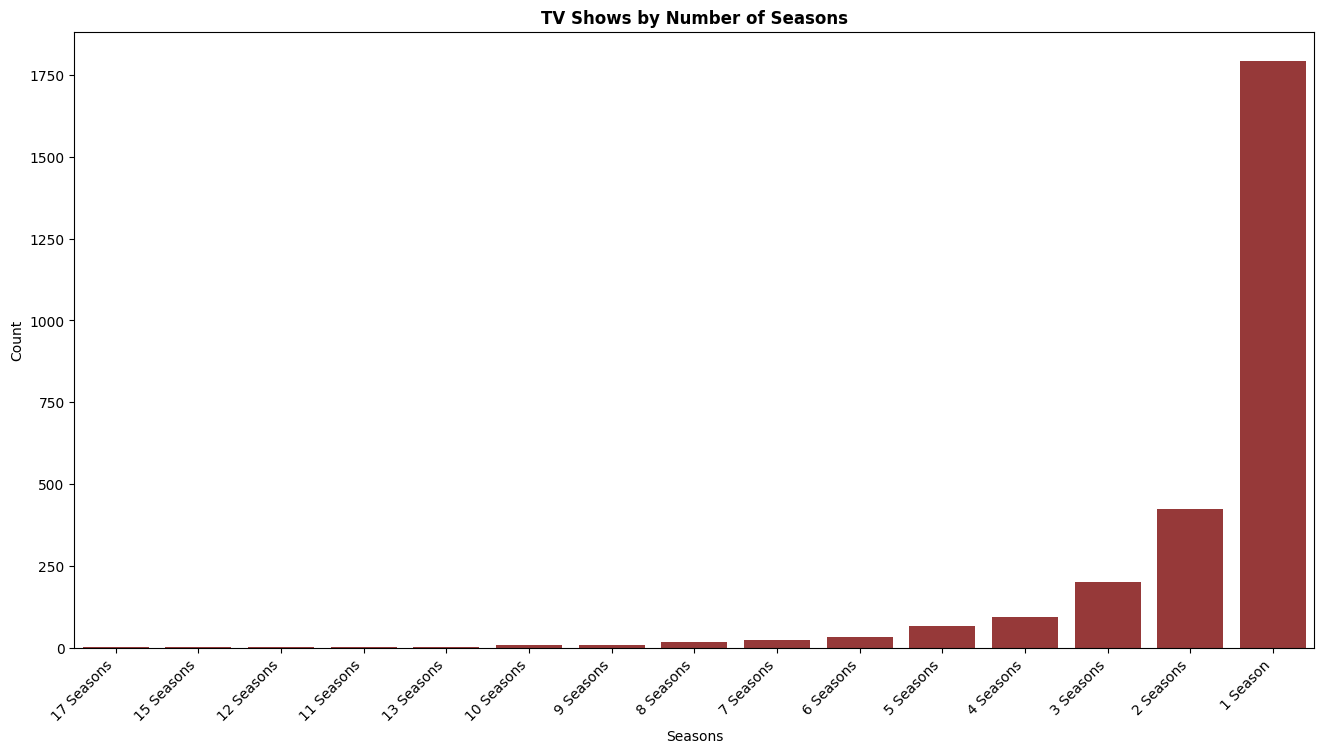

In [ ]:
# Filter the DataFrame for TV Shows
df= netflix_titles_df
df = df.loc[df['type'] == 'TV Show']
season_tvshow = df['duration'].value_counts().sort_values(ascending=True)

# Specify the color from your scheme
color = '#A52A2A'  # You can change this to any color from your color scheme list

# Plot the bar chart
plt.figure(figsize=(16, 8))
sns.barplot(x=season_tvshow.index, y=season_tvshow.values, color=color)
plt.title('TV Shows by Number of Seasons', fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Seasons')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better alignment

plt.show()

In [ ]:
hours_watched_df.head()

,title,available globally?,hours viewed
0,The Night Agent: Season 1,Yes,812100000
1,Ginny & Georgia: Season 2,Yes,665100000
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,622800000
3,Wednesday: Season 1,Yes,507700000
4,Queen Charlotte: A Bridgerton Story,Yes,503000000


In [ ]:
top_20_hours_viewed = hours_watched_df.sort_values(by='hours viewed', ascending=False).head(20)
top_20_hours_viewed


,title,available globally?,hours viewed
0,The Night Agent: Season 1,Yes,812100000
1,Ginny & Georgia: Season 2,Yes,665100000
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,622800000
3,Wednesday: Season 1,Yes,507700000
4,Queen Charlotte: A Bridgerton Story,Yes,503000000
5,You: Season 4,Yes,440600000
6,La Reina del Sur: Season 3,No,429600000
7,Outer Banks: Season 3,Yes,402500000
8,Ginny & Georgia: Season 1,Yes,302100000
9,FUBAR: Season 1,Yes,266200000


In [ ]:
top_20_hours_viewed.to_csv('top_10_hours_viewed.csv', index=False)



 will save to a csv file and manually search imdb for a list of genres and imdb ratings to create a new dataframe

In [ ]:
top_20_viewed= pd.read_excel(r"C:\Users\DELL\OneDrive\Desktop\Netflix_project\repo\top_20_hours_viewed.2.xlsx")
top_20_viewed.head(20)

,title,available globally?,hours viewed,genre,imdb rating
0,The Night Agent: Season 1,Yes,812100000,"Action, Drama, Thriller",7.5
1,Ginny & Georgia: Season 2,Yes,665100000,"Comedy, Drama",7.5
2,The Glory: Season 1,Yes,622800000,"Mystery, Thriller, Drama",8.1
3,Wednesday: Season 1,Yes,507700000,"Comdey, Crime, Fantasy",8.1
4,Queen Charlotte: A Bridgerton Story,Yes,503000000,"Drama, History, Romance",7.5
5,You: Season 4,Yes,440600000,"Crime, Romance, Drama",7.7
6,La Reina del Sur: Season 3,No,429600000,"Action, Crime, Drama",7.8
7,Outer Banks: Season 3,Yes,402500000,"Action, Crime, Drama",7.5
8,Ginny & Georgia: Season 1,Yes,302100000,"Comedy, Drama",7.5
9,FUBAR: Season 1,Yes,266200000,"Comedy, Music",6.8


In [53]:
top_20_viewed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                20 non-null     object 
 1   available globally?  20 non-null     object 
 2   hours viewed         20 non-null     int64  
 3   genre                20 non-null     object 
 4   imdb rating          20 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 932.0+ bytes


C:\Users\DELL\AppData\Local\Temp\ipykernel_10828\1621280170.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_viewed, x='genre', y='hours viewed',  palette='hot')


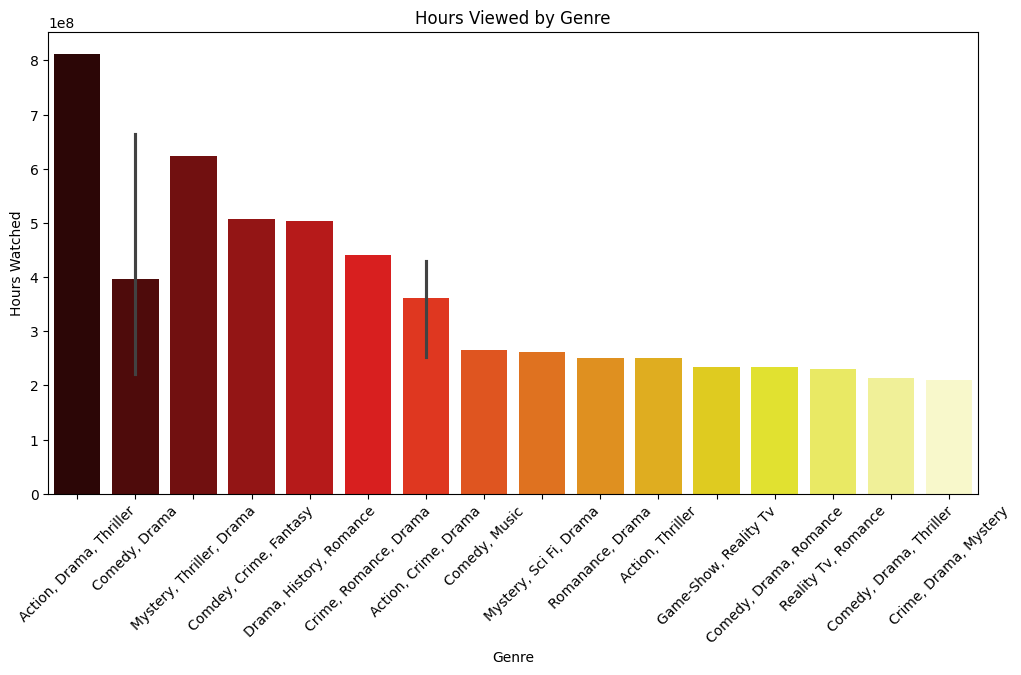

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_viewed, x='genre', y='hours viewed',  palette='hot')
plt.title('Hours Viewed by Genre')
plt.xlabel('Genre')
plt.ylabel('Hours Watched')
plt.xticks(rotation=45)
plt.show()